# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
  0% 0.00/4.75M [00:00<?, ?B/s]
100% 4.75M/4.75M [00:00<00:00, 170MB/s]
Archive:  bus-breakdown-and-delays.zip
  inflating: Bus_Breakdown_and_Delays.csv  


## Importing Libraries

In [2]:
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib seaborn



  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [46]:
df=pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [47]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [48]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [49]:
df.sample(10)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
11631,2015-2016,1230839,Special Ed PM Run,HA 578,L040,Other,14646,11/19/2015 01:12:00 PM,11/19/2015 01:19:00 PM,Brooklyn,...,60 Mins.,0,Yes,Yes,No,11/19/2015 01:19:00 PM,NaN,11/19/2015 01:27:55 PM,Running Late,School-Age
61929,2016-2017,1282666,Special Ed AM Run,6028,X288,Heavy Traffic,09126,09/09/2016 06:49:00 AM,09/09/2016 06:51:00 AM,Bronx,...,15 minutes,0,Yes,No,No,09/09/2016 06:51:00 AM,NaN,09/09/2016 06:51:19 AM,Running Late,School-Age
135119,2016-2017,1356915,Pre-K/EI,3083,B0227A,Heavy Traffic,C925,06/12/2017 07:20:00 AM,06/12/2017 07:30:00 AM,Brooklyn,...,20 min,0,Yes,Yes,Yes,06/12/2017 07:30:00 AM,NaN,06/12/2017 09:59:14 AM,Running Late,Pre-K
134113,2016-2017,1355878,Special Ed AM Run,1106,J729,Heavy Traffic,75003,06/06/2017 08:14:00 AM,06/06/2017 08:15:00 AM,New Jersey,...,25 min,8,Yes,Yes,Yes,06/06/2017 08:15:00 AM,NaN,06/06/2017 08:15:37 AM,Running Late,School-Age
40605,2015-2016,1260856,Pre-K/EI,7017,B0504A,Heavy Traffic,C118,04/07/2016 07:10:00 AM,04/07/2016 07:22:00 AM,Brooklyn,...,20 MINS,2,Yes,Yes,Yes,04/07/2016 07:22:00 AM,NaN,04/07/2016 02:26:37 PM,Running Late,Pre-K
137497,2016-2017,1359306,Pre-K/EI,65,05,Other,C589,06/20/2017 06:52:00 AM,06/20/2017 06:53:00 AM,Brooklyn,...,25min,0,Yes,Yes,Yes,06/20/2017 06:53:00 AM,NaN,06/20/2017 06:53:11 AM,Running Late,Pre-K
45285,2015-2016,1265586,Special Ed AM Run,5657,Q129,Heavy Traffic,29059,05/04/2016 05:55:00 AM,05/04/2016 05:56:00 AM,Queens,...,15 MIN,0,No,Yes,Yes,05/04/2016 05:56:00 AM,NaN,05/04/2016 05:56:14 AM,Running Late,School-Age
126125,2016-2017,1347507,Special Ed AM Run,15077,K413,Other,14380,05/11/2017 07:16:00 AM,05/11/2017 07:16:00 AM,Brooklyn,...,20 mins,0,Yes,Yes,No,05/11/2017 07:16:00 AM,NaN,05/11/2017 07:16:33 AM,Running Late,School-Age
51795,2015-2016,1272129,Special Ed AM Run,1349,M994,Heavy Traffic,"03480, 03910, 03825",05/31/2016 07:45:00 AM,05/31/2016 07:46:00 AM,Manhattan,...,10 MINS,7,Yes,Yes,No,05/31/2016 07:46:00 AM,NaN,05/31/2016 07:48:22 AM,Running Late,School-Age
66133,2016-2017,1286917,Special Ed AM Run,2119,K117,Heavy Traffic,22206,09/22/2016 07:10:00 AM,09/22/2016 07:19:00 AM,Brooklyn,...,40 min,0,No,No,No,09/22/2016 07:19:00 AM,NaN,09/22/2016 07:19:17 AM,Running Late,School-Age


In [50]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [52]:
df.shape

(147972, 21)

In [53]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [54]:
df.duplicated().sum()

0

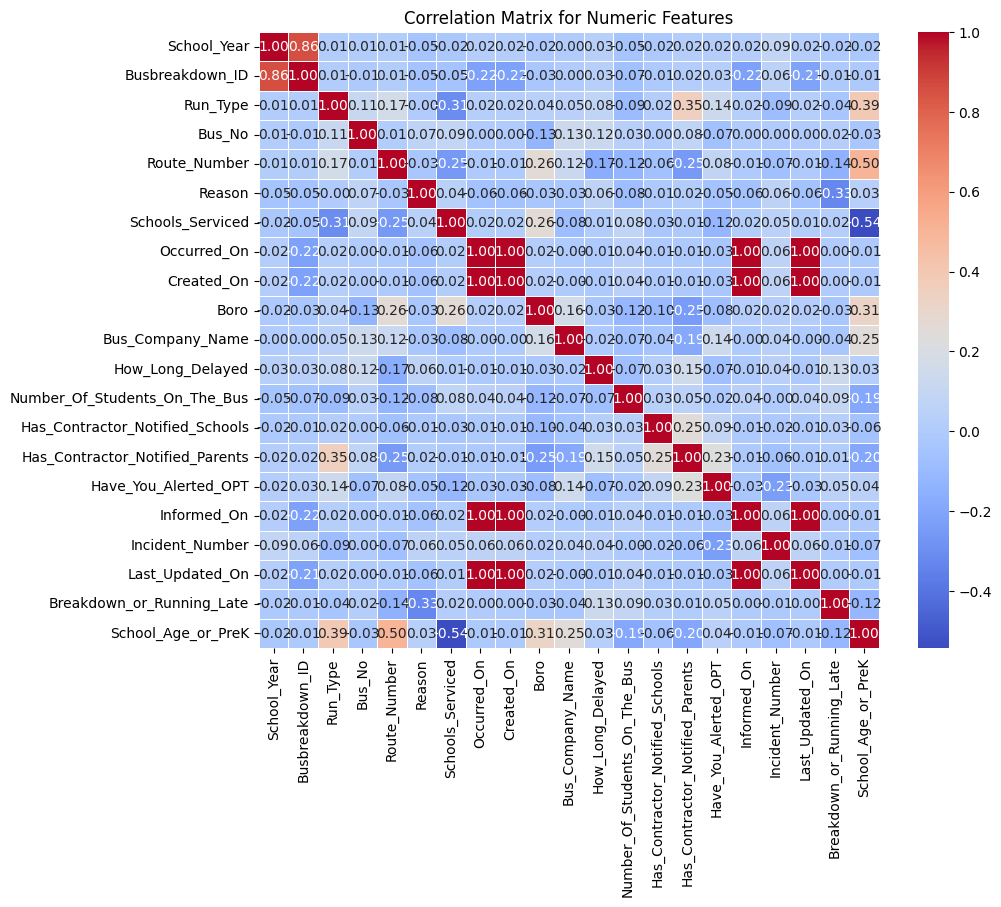

In [103]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [56]:
from sklearn.preprocessing import  MinMaxScaler


# Min-Max scaling
min_max_scaler = MinMaxScaler()
df['Number_Of_Students_On_The_Bus'] = min_max_scaler.fit_transform(df[['Number_Of_Students_On_The_Bus']])


In [57]:
df['Run_Type']=df['Run_Type'].fillna(df['Run_Type'].mode()[0])

In [58]:
df['Route_Number']=df['Route_Number'].fillna(df['Route_Number'].mode()[0])
df['Reason']=df['Reason'].fillna(df['Reason'].mode()[0])
df['Boro']=df['Boro'].fillna(df['Boro'].mode()[0])
df['How_Long_Delayed']=df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0])


In [59]:
df['Incident_Number']=df['Incident_Number'].fillna(df['Incident_Number'].mode()[0])


In [60]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df)

        School_Year  Busbreakdown_ID  Run_Type  Bus_No  Route_Number  Reason  \
0                 0            12019         3    7481            77       6   
1                 0            12215         3    8114            77       3   
2                 0             3083         3    4662           209       3   
3                 0             2801         3    4547           209       6   
4                 0             3111         3    4554           209       6   
...             ...              ...       ...     ...           ...     ...   
147967            1           124081         3    8138           209       3   
147968            1           127111         3      15           479       3   
147969            1           138497         9    8642         10880       3   
147970            1           138498         9    6145          7663       9   
147971            1           138499         6    3502          2288       6   

        Schools_Serviced  Occurred_On  

In [87]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Breakdown_or_Running_Late'])
y = df['Breakdown_or_Running_Late']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [88]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [89]:

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [ ]:

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7987 - loss: 118.7688 - val_accuracy: 0.8791 - val_loss: 60.0163
Epoch 2/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7983 - loss: 44.6127 - val_accuracy: 0.8870 - val_loss: 57.1733
Epoch 3/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8032 - loss: 33.1991 - val_accuracy: 0.3911 - val_loss: 60.6251
Epoch 4/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8042 - loss: 20.3018 - val_accuracy: 0.8847 - val_loss: 11.7000
Epoch 5/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8064 - loss: 14.8441 - val_accuracy: 0.8868 - val_loss: 29.8721
Epoch 6/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8089 - loss: 11.4812 - val_accuracy: 0.8698 - val_loss: 2.2753
Epoch 7/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8082 - loss: 7.1653 - val_accuracy: 0.8863 - val_loss: 5.6615
Epoch 8/50
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8057 - lo

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [92]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")
y_pred = (model.predict(X_test) > 0.5).astype("int32")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



1526/1526 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8860 - loss: 0.3552
Test Accuracy: 0.8857693076133728
1526/1526 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Confusion Matrix:
 [[    0  5578]
 [    0 43253]]


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [101]:
predictions = model.predict(X_test)

1526/1526 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

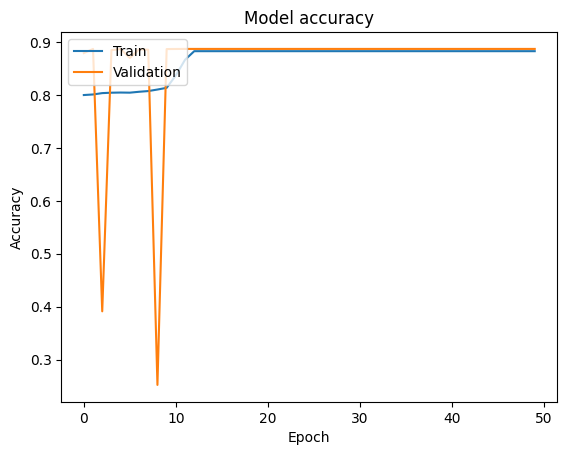

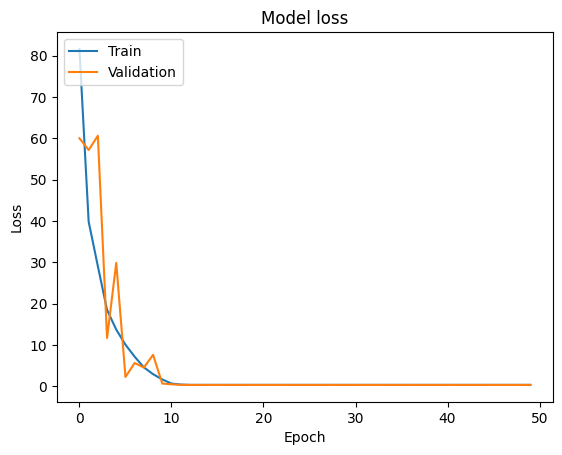

In [93]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Save the Model
Save the trained model for submission.

In [104]:
model.save('task2.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
ANSWER: i used label encoder so that i can change mt data type into numeric so that i can build my model

2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?

ANSWER:Actually i tried to put more layers until i achived an acurracy of 80%
also i used relu since it is none linearity

3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
ANSWER:yeah i experiment different values but this is the most aprpropriate one and i choosed adam optimizer cause it is commonly used with multiple issues.

4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?

ANSWER:

5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
ANSWER: yea i used dropout since i want a perfect accuracy so i just drop some neurons
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?

ANSWER:i just provide the accuracy and loss
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?

ANSWER:actuallt to late about asking this question! i forgot what i sis and really im confused rn:( i did more things and still i need to make the performance better
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

ANSWER:yea we should use oversampling or undersampling methods to solve this problem.

### Answer Here: